In [33]:
import sqlite3
import random
import datetime

# Connect or create the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop and recreate the table
cursor.execute("DROP TABLE IF EXISTS sales")

cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL,
    sale_date TEXT
)
""")

# Sample product list
products = [
    ("Laptop", 800, 1200),
    ("Phone", 400, 700),
    ("Tablet", 200, 500),
    ("Headphones", 50, 200),
    ("Monitor", 150, 300),
    ("Keyboard", 20, 100),
    ("Mouse", 10, 80),
    ("Speaker", 40, 250)
]

# Generate 150 random sales records
sales_data = []
for _ in range(150):
    product, min_price, max_price = random.choice(products)
    quantity = random.randint(1, 5)
    price = round(random.uniform(min_price, max_price), 2)
    date = datetime.date.today() - datetime.timedelta(days=random.randint(0, 30))
    sales_data.append((product, quantity, price, date.strftime("%Y-%m-%d")))

# Insert data into table
cursor.executemany("INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)", sales_data)

# Commit and close
conn.commit()
conn.close()

print("✅ sales_data.db created with 150 fake rows.")


✅ sales_data.db created with 150 fake rows.


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query: group by product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Load query result into pandas DataFrame
df = pd.read_sql_query(query, conn)



# Print results
print("Sales Summary:\n")
df


Sales Summary:



,product,total_qty,revenue
0,Headphones,54,6678.28
1,Keyboard,55,3106.10
2,Laptop,61,61280.49
3,Monitor,54,12068.74
4,Mouse,66,2753.60
5,Phone,65,35116.03
6,Speaker,36,5409.23
7,Tablet,53,17487.63


<Figure size 800x500 with 0 Axes>

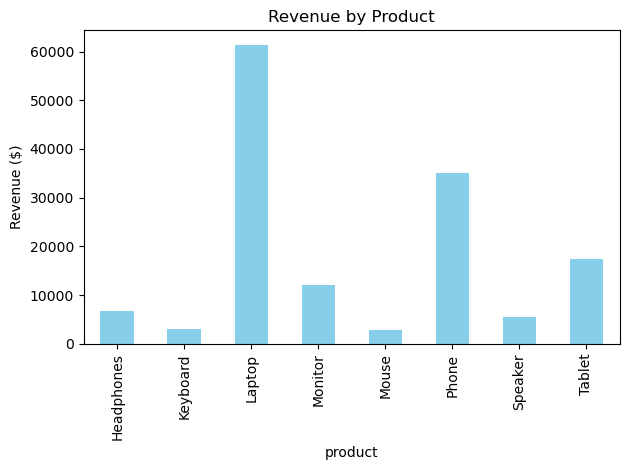

In [2]:
# Plot bar chart for revenue
plt.figure(figsize=(8,5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional
plt.show()


In [3]:
query="""
SELECT sale_date, SUM(quantity * price) AS daily_revenue 
FROM sales 
GROUP BY sale_date 
ORDER BY sale_date


"""

df= pd.read_sql_query(query,conn)


print("Sales Summary:\n")
df.head(10)

Sales Summary:



,sale_date,daily_revenue
0,2025-04-04,6240.71
1,2025-04-05,3100.76
2,2025-04-06,3480.67
3,2025-04-07,4795.38
4,2025-04-08,4687.07
5,2025-04-09,11253.48
6,2025-04-10,345.99
7,2025-04-11,5558.24
8,2025-04-12,1962.84
9,2025-04-13,7303.93


<Axes: title={'center': 'Daily Revenue Trend'}, xlabel='sale_date'>

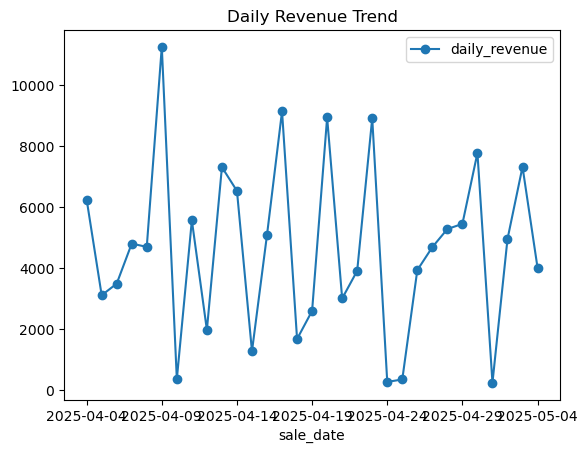

In [4]:
df.plot(kind='line', x='sale_date', y='daily_revenue', title="Daily Revenue Trend", marker='o')


In [5]:
query="""
SELECT product, SUM(quantity) AS total_qty 
FROM sales 
GROUP BY product
ORDER BY total_qty DESC

"""
df = pd.read_sql_query(query,conn)
print("Sales Summary:\n")
df

Sales Summary:



,product,total_qty
0,Mouse,66
1,Phone,65
2,Laptop,61
3,Keyboard,55
4,Monitor,54
5,Headphones,54
6,Tablet,53
7,Speaker,36


<Axes: title={'center': 'Total Quantity Sold'}, ylabel='product'>

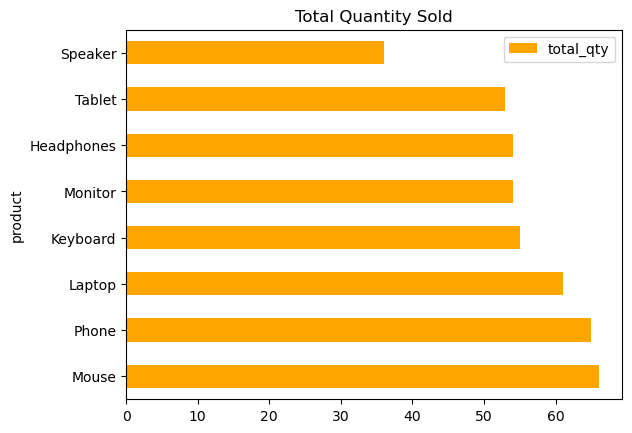

In [6]:
df.plot(kind='barh', x='product', y='total_qty', title="Total Quantity Sold", color='orange')


In [7]:
query="""
SELECT product, ROUND(AVG(price), 2) AS avg_price 
FROM sales 
GROUP BY product
"""
df=pd.read_sql_query(query,conn)

print("Summary:\n")
df

Summary:



,product,avg_price
0,Headphones,123.57
1,Keyboard,61.79
2,Laptop,992.70
3,Monitor,230.57
4,Mouse,41.20
5,Phone,543.61
6,Speaker,146.96
7,Tablet,348.27


<Axes: title={'center': 'Average Price per Product'}, xlabel='product'>

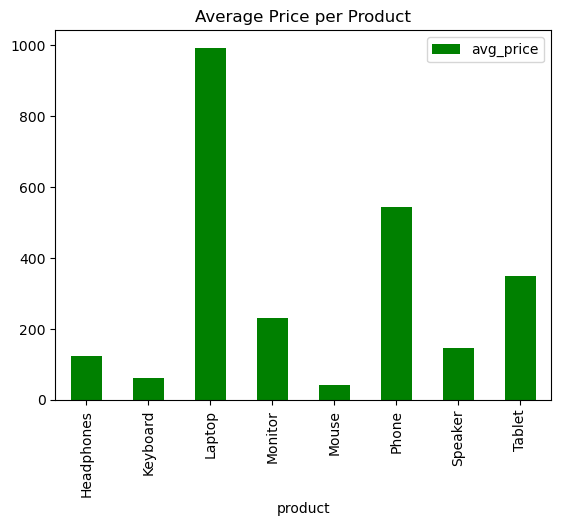

In [8]:
df.plot(kind='bar', x='product', y='avg_price', title="Average Price per Product", color='green')


In [9]:
query="""
SELECT product, SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product 
ORDER BY revenue DESC 
LIMIT 5
"""

df=pd.read_sql_query(query,conn)
df

,product,revenue
0,Laptop,61280.49
1,Phone,35116.03
2,Tablet,17487.63
3,Monitor,12068.74
4,Headphones,6678.28


<Axes: title={'center': 'Top 5 Products by Revenue'}, ylabel='revenue'>

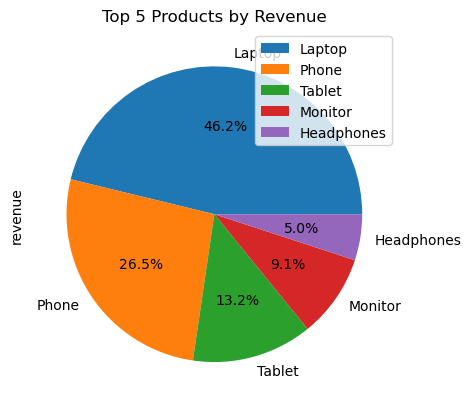

In [10]:
df.plot(kind='pie', y='revenue', labels=df['product'], autopct='%1.1f%%', title="Top 5 Products by Revenue")


In [13]:
query="""
SELECT sale_date, COUNT(*) AS total_orders 
FROM sales 
GROUP BY sale_date
ORDER BY sale_date
"""
df=pd.read_sql_query(query,conn)
conn.close()

df.head(10)

,sale_date,total_orders
0,2025-04-04,6
1,2025-04-05,3
2,2025-04-06,6
3,2025-04-07,5
4,2025-04-08,5
5,2025-04-09,8
6,2025-04-10,2
7,2025-04-11,6
8,2025-04-12,3
9,2025-04-13,5


<Axes: title={'center': 'Total Orders Per Day'}, xlabel='sale_date'>

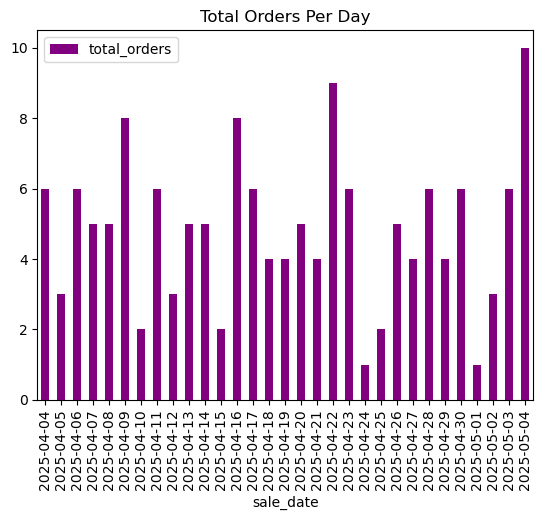

In [14]:
df.plot(kind='bar', x='sale_date', y='total_orders', title="Total Orders Per Day", color='purple')
